In [44]:
import os
import glob
import numpy as np
import tensorflow as tf

from PIL import Image
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#Setting up directory and lists for importing
pwd = os.getcwd()
data_folder = os.path.join(pwd, 'Data')

animals = ['cheetah', 'fox', 'hyena', 'lion', 'tiger', 'wolf']
sizes = [224, 300, 512]
print(data_folder)

C:\Users\zburt\Desktop\Data Science Projects\Data


In [45]:
"""
Reads in full paths of all .png files for given animal and resolution
@param animal - Animal class to load
@param size - Resolution of images
@param dir_path - Directory path of the images
@return List of paths for all .png files in
"""
def load_animal_image_paths(animal, size, dir_path):
    #Parameter viability check
    if not os.path.exists(dir_path):
        print(f"{dir_path} path not found.")
        return
    elif animal not in animals:
        print(f"{animal} is not an available animal to load.")
        return
    elif size not in sizes:
        print(f"{size} is not an available resolution.")
        return
        
    animal_size_path = os.path.join(dir_path, animal + '-resize-' + str(size), 'resize-' + str(size))

    return list(glob.iglob(animal_size_path + '**/*.png', recursive=True))  

In [46]:
#Load all animal images into thier own lists

image_resolution = 224

cheetah_image_paths = load_animal_image_paths('cheetah', image_resolution, data_folder)
fox_image_paths = load_animal_image_paths('fox', image_resolution, data_folder)
hyena_image_paths = load_animal_image_paths('hyena', image_resolution, data_folder)
lion_image_paths = load_animal_image_paths('lion', image_resolution, data_folder)
tiger_image_paths = load_animal_image_paths('tiger', image_resolution, data_folder)
wolf_image_paths = load_animal_image_paths('wolf', image_resolution, data_folder)

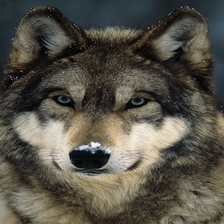

In [47]:
#Quick check to be sure images paths have loaded
Image.open(str(wolf_image_paths[0]))

In [48]:
"""
Function uses PLI.Image.open() to load all images within list of file paths
@param image_path_list - List of file paths to load
@return List of loaded image objects
"""
def load_images_from_path(image_path_list):
    image_list = []
    for file_name in image_path_list:
        try:
            im = Image.open(file_name)
        except:
            print(f"Error loading file: {file_name}")
            
        image_list.append(np.array(im))
        
    #Remove images that are only 2 dimensions or have an alpha value in the 3rd dimension
    cleaned_image_set = [x for x in image_list if len(x.shape) == 3 and x.shape[2] == 3]
        
    return cleaned_image_set

In [49]:
#Load in the images from the file paths into numpy arrays
cheetah_images = load_images_from_path(cheetah_image_paths)
fox_images = load_images_from_path(fox_image_paths)
hyena_images = load_images_from_path(hyena_image_paths)
lion_images = load_images_from_path(lion_image_paths)
tiger_images = load_images_from_path(tiger_image_paths)
wolf_images = load_images_from_path(wolf_image_paths)

#Combine all animal numpy arrays into 1
animal_images_list = [cheetah_images, fox_images, hyena_images, lion_images, tiger_images, wolf_images]

Error loading file: C:\Users\zburt\Desktop\Data Science Projects\Data\cheetah-resize-224\resize-224\00000244_224resized.png
Error loading file: C:\Users\zburt\Desktop\Data Science Projects\Data\hyena-resize-224\resize-224\00000224_224resized.png


In [50]:
#Create the label set for the animals and convert them to numpy arrays for the NN
label_set = []
for index, animal_list in enumerate(animal_images_list):
    label_set.extend([index] * len(animal_list))
training_set = cheetah_images + fox_images + hyena_images + lion_images + tiger_images + wolf_images

training_set = np.array(training_set)
label_set = np.array(label_set)

#Splitting for training and testing
x_train, x_test, y_train, y_test = train_test_split(training_set, label_set, test_size=0.20, random_state=42, shuffle=True)

In [55]:
#Compose and compile CNN model using Sparse Categorical Cross Entropy for loss
num_classes = len(animals)
img_height = image_resolution
img_width = image_resolution

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [58]:
#Execute the model training
epochs=10
history = model.fit(
  x_train,
  y_train,
  epochs=epochs,
  validation_data = (x_test, y_test),
  verbose = 1
)

Epoch 1/10
43/43 [==============================] - 35s 809ms/step - loss: 1.3217 - accuracy: 0.4808 - val_loss: 1.3165 - val_accuracy: 0.4779
Epoch 2/10
43/43 [==============================] - 35s 806ms/step - loss: 0.9983 - accuracy: 0.6202 - val_loss: 1.4197 - val_accuracy: 0.4749
Epoch 3/10
43/43 [==============================] - 35s 804ms/step - loss: 0.7451 - accuracy: 0.7353 - val_loss: 1.4875 - val_accuracy: 0.5221
Epoch 4/10
43/43 [==============================] - 35s 810ms/step - loss: 0.4737 - accuracy: 0.8451 - val_loss: 1.6368 - val_accuracy: 0.5221
Epoch 5/10
43/43 [==============================] - 35s 808ms/step - loss: 0.2580 - accuracy: 0.9218 - val_loss: 1.8326 - val_accuracy: 0.5221
Epoch 6/10
43/43 [==============================] - 35s 805ms/step - loss: 0.1299 - accuracy: 0.9624 - val_loss: 2.3166 - val_accuracy: 0.5103
Epoch 7/10
43/43 [==============================] - 35s 807ms/step - loss: 0.0592 - accuracy: 0.9875 - val_loss: 2.8453 - val_accuracy: 0.5015